In [10]:
import numpy as np
import pandas as pd
import time

# 象山美院小区数据
csv = pd.read_csv('../resource/临时数据.csv')

# 将时间戳转换为时间格式，并化为分钟级时间
index = csv.get('MRO_TS')
index
for i in range(len(csv)):
    index[i] = time.strftime("%Y-%m-%d %H:%M", time.localtime(index[i]))

# 删除整列NaN
for i in csv.columns:
    count = 0
    for j in range(len(csv)):
        if pd.isnull(csv.loc[j, i]):
            count += 1
            # csv.loc[j, i] = 0 # 使用非空值填充空值
    if count == len(csv):
        csv.drop(labels=i, axis=1, inplace=True)

csv = csv[:][pd.isna(csv['OPT_LON']) == False]
csv.reset_index(drop=True, inplace=True)

C:\Users\mapple\AppData\Local\Temp\ipykernel_2808\3052741671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  index[i] = time.strftime("%Y-%m-%d %H:%M", time.localtime(index[i]))


In [12]:
from sklearn.preprocessing import OneHotEncoder

class LocalOneHotEncoder(object):

  def __init__(self, target_columns):
    '''
    @param: target_columns --- To perform one-hot encoding column name list. 
    '''
    self.enc = OneHotEncoder(handle_unknown='ignore')
    self.col_names = target_columns

  def fit(self, df):
    '''
    @param: df --- pandas DataFrame
    '''
    self.enc.fit(df[self.col_names].values)
    self.labels = np.array(self.enc.categories_).ravel()
    self.new_col_names = self.gen_col_names(df)

  def gen_col_names(self, df):
    '''
    @param:  df --- pandas DataFrame
    '''
    new_col_names = []
    for col in self.col_names:
      for val in df[col].unique():
        new_col_names.append("{}_{}".format(col, val))
    return new_col_names

  def transform(self, df):
     '''
     @param:  df --- pandas DataFrame
     '''
     return pd.DataFrame(data = self.enc.transform(df[self.col_names]).toarray(), 
                         columns = self.new_col_names, 
                         dtype=int) 

ONEHOT_COLUMNS = ['N1_CELL_ID']
local_ohe = LocalOneHotEncoder(ONEHOT_COLUMNS)
local_ohe.fit(csv)
oht_df = local_ohe.transform(csv)
oht_df

e:\visual studio code\研究生\machine-learning\markdown\other\jupyter\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(


,N1_CELL_ID_193700873,N1_CELL_ID_185408783,N1_CELL_ID_201741123,N1_CELL_ID_202122305,N1_CELL_ID_202122306,N1_CELL_ID_201741124,N1_CELL_ID_193700872,N1_CELL_ID_121617857,N1_CELL_ID_211555905,N1_CELL_ID_201619780,...,N1_CELL_ID_185409025,N1_CELL_ID_201741121,N1_CELL_ID_185409027,N1_CELL_ID_185400833,N1_CELL_ID_185409033,N1_CELL_ID_185409028,N1_CELL_ID_185409043,N1_CELL_ID_185409031,N1_CELL_ID_201619779,N1_CELL_ID_185400845
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10791,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10792,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10793,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10794,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# t-SNE降维
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2) 
X_tsne = tsne.fit_transform(oht_df)
X_tsne

e:\visual studio code\研究生\machine-learning\markdown\other\jupyter\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
e:\visual studio code\研究生\machine-learning\markdown\other\jupyter\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


array([[-33.002728 , -16.524826 ],
       [-50.95814  , -32.809544 ],
       [-20.807524 , -33.16028  ],
       ...,
       [ -3.9962509, -54.224583 ],
       [ -3.9962509, -54.224583 ],
       [  1.2949679,  -1.732691 ]], dtype=float32)

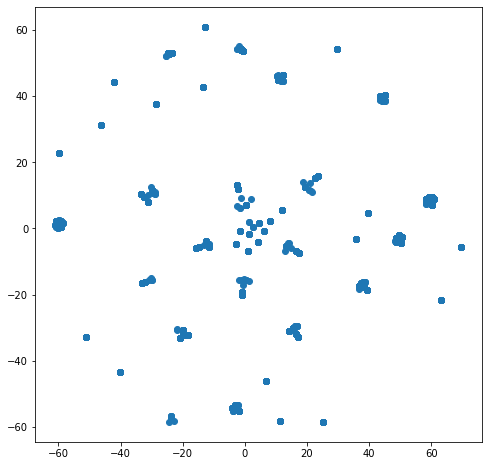

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(X_tsne[:, 0].T, X_tsne[:, 1].T)
plt.show()

e:\visual studio code\研究生\machine-learning\markdown\other\jupyter\lib\site-packages\sklearn\cluster\_affinity_propagation.py:236: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


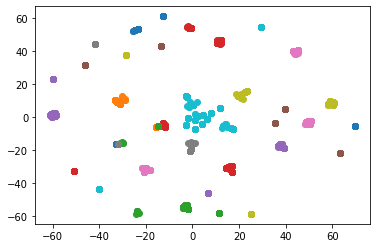

In [15]:
# 亲和力传播聚类
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AffinityPropagation
from matplotlib import pyplot

# 定义数据集
X = X_tsne
# 定义模型
model = AffinityPropagation(damping=0.9)
# 匹配模型
model.fit(X)
# 为每个示例分配一个集群
yhat = model.predict(X)
# 检索唯一群集
clusters = unique(yhat)
# 为每个群集的样本创建散点图
for cluster in clusters:
    # 获取此群集的示例的行索引
    row_ix = where(yhat == cluster)
    # 创建这些样本的散布
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# 绘制散点图
pyplot.show()

In [16]:
from geopy.distance import geodesic
import datetime

# 时间比较函数
def compare_time(startTime, endTime):
    d_start = datetime.datetime.strptime(startTime, '%Y-%m-%d %H:%M')
    d_end = datetime.datetime.strptime(endTime, '%Y-%m-%d %H:%M')
    if d_start == d_end:
        return False
    else:
        return True

# MRO_TS时间到分钟，时间应该一致
# IMSI不一致，确保是两个不同的人
# MRO_TS1 IMSI1  MRO_TS2 IMSI2 LON1 LAT1 LON2 LAT2 category DISTANCE
# ['MRO_TS', 'IMSI', 'OPT_LON', 'OPT_LAT']
content = []
category = 0
for cluster in clusters:
    category += 1
    row_ix = where(yhat == cluster)
    for dim in range(len(row_ix)):
        for i in range(len(row_ix[dim])):
            j = i + 1
            while j < len(row_ix[dim]):
                if row_ix[dim][i] == row_ix[dim][j]: 
                    pass
                elif csv.loc[row_ix[dim][i], 'TELEPHONE'] == csv.loc[row_ix[dim][j], 'TELEPHONE'] or compare_time(csv.loc[row_ix[dim][i], 'MRO_TS'], csv.loc[row_ix[dim][j], 'MRO_TS']): pass
                else:
                    distance = geodesic((csv.loc[row_ix[dim][i], 'OPT_LAT'], csv.loc[row_ix[dim][i], 'OPT_LON']), (csv.loc[row_ix[dim][j], 'OPT_LAT'], csv.loc[row_ix[dim][j], 'OPT_LON'])).m
                    content.append([csv.loc[row_ix[dim][i], 'MRO_TS'], csv.loc[row_ix[dim][i], 'TELEPHONE'], csv.loc[row_ix[dim][j], 'MRO_TS'], csv.loc[row_ix[dim][j], 'TELEPHONE'], csv.loc[row_ix[dim][i], 'OPT_LAT'], csv.loc[row_ix[dim][i], 'OPT_LON'], csv.loc[row_ix[dim][j], 'OPT_LAT'], csv.loc[row_ix[dim][j], 'OPT_LON'], category, distance])
                j += 1
content

[['2022-06-16 11:48',
  18758061716,
  '2022-06-16 11:48',
  17816880740,
  30.163822,
  120.065954,
  30.157599,
  120.069172,
  1,
  756.3001412473135],
 ['2022-06-16 11:48',
  18758061716,
  '2022-06-16 11:48',
  13616518187,
  30.163822,
  120.065954,
  30.162041,
  120.066404,
  1,
  202.13573067319675],
 ['2022-06-16 11:48',
  18758061716,
  '2022-06-16 11:48',
  15068719035,
  30.163822,
  120.065954,
  30.165678,
  120.068293,
  1,
  305.11556744095776],
 ['2022-06-16 11:48',
  18758061716,
  '2022-06-16 11:48',
  15267089219,
  30.163822,
  120.065954,
  30.161536,
  120.066769,
  1,
  265.29720799364753],
 ['2022-06-16 11:48',
  18758061716,
  '2022-06-16 11:48',
  17757057505,
  30.163822,
  120.065954,
  30.15775,
  120.069086,
  1,
  737.6363466969113],
 ['2022-06-16 11:48',
  18758061716,
  '2022-06-16 11:48',
  15870680685,
  30.163822,
  120.065954,
  30.162159,
  120.066747,
  1,
  199.55174239238946],
 ['2022-06-16 11:48',
  18758061716,
  '2022-06-16 11:48',
  136165

In [ ]:
# 数据保存
content_pandas = pd.DataFrame(content, columns=['MRO_TS1', 'telephone1',  'MRO_TS2', 'telephone2', 'LON1', 'LAT1', 'LON2', 'LAT2', 'category', 'DISTANCE'])
select_zone = content_pandas[:][:]
select_zone.sort_values(by='DISTANCE')
select_distinct = select_zone.drop_duplicates(subset=['telephone1', 'telephone2', 'category'], keep='first', inplace=False)
select_distinct_new = select_distinct[:][select_distinct['DISTANCE'] <= 250]
select_distinct_new.to_csv('../resource/第一个小区250米内.csv')